##스프레드 옵션 (Spread Option):

스프레드 옵션(Spread Option)은 두 기초 자산의 가격 차이에 기반한 옵션입니다. 이는 두 기초 자산의 가격 차이를 기초 자산으로 하여 옵션의 페이오프가 결정됩니다. 주로 두 자산의 가격 스프레드를 활용하여 특정 전략을 구현하고자 할 때 사용됩니다.

Spread Option Price: 12.62


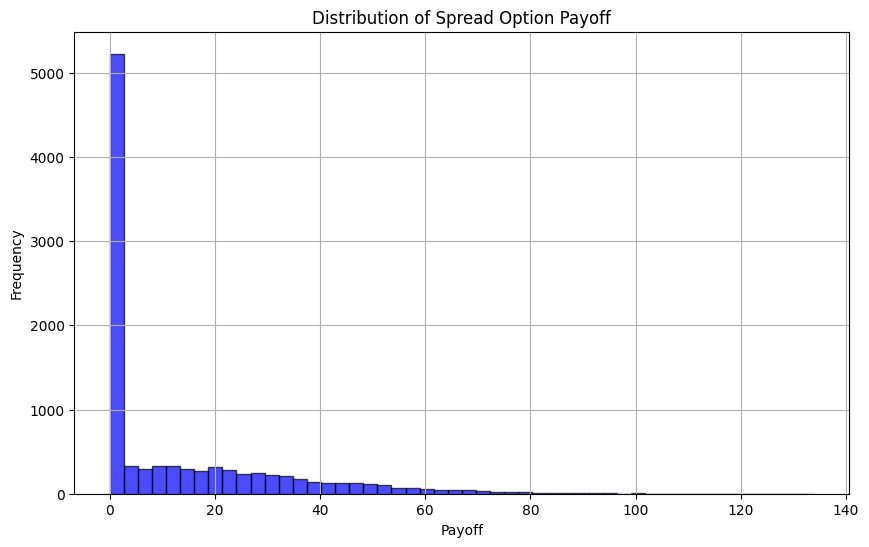

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def spread_option_payoff(paths1, paths2, K):
    """
    스프레드 옵션의 페이오프 계산 함수

    Parameters:
    paths1: 첫 번째 주식 가격 경로 배열
    paths2: 두 번째 주식 가격 경로 배열
    K: 행사가격

    Returns:
    스프레드 옵션의 페이오프 배열
    """
    spread = paths1[:, -1] - paths2[:, -1]
    payoff = np.maximum(spread - K, 0)
    return payoff

# 예제 파라미터 설정
S0_1 = 100  # 첫 번째 주식의 초기 가격
S0_2 = 100  # 두 번째 주식의 초기 가격
r = 0.05  # 무위험 이자율
sigma1 = 0.2  # 첫 번째 주식의 변동성
sigma2 = 0.25  # 두 번째 주식의 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 0  # 스프레드 옵션의 행사가격

# 주식 가격 경로 시뮬레이션
paths1 = simulate_stock_paths(S0_1, r, sigma1, T, M, I)
paths2 = simulate_stock_paths(S0_2, r, sigma2, T, M, I)

# 스프레드 옵션 페이오프 계산
spread_payoff = spread_option_payoff(paths1, paths2, K)

# 스프레드 옵션 가격 계산 (할인된 페이오프 평균)
spread_price = np.exp(-r * T) * np.mean(spread_payoff)
print(f"Spread Option Price: {spread_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(spread_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Spread Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


아래는 두 주식(애플, 아마존)의 가격 차이에 기반한 스프레드 콜 옵션의 페이오프를 계산하고 시각화하는 파이썬 코드 예제입니다.

[*********************100%%**********************]  2 of 2 completed


Spread Option Price: 0.39


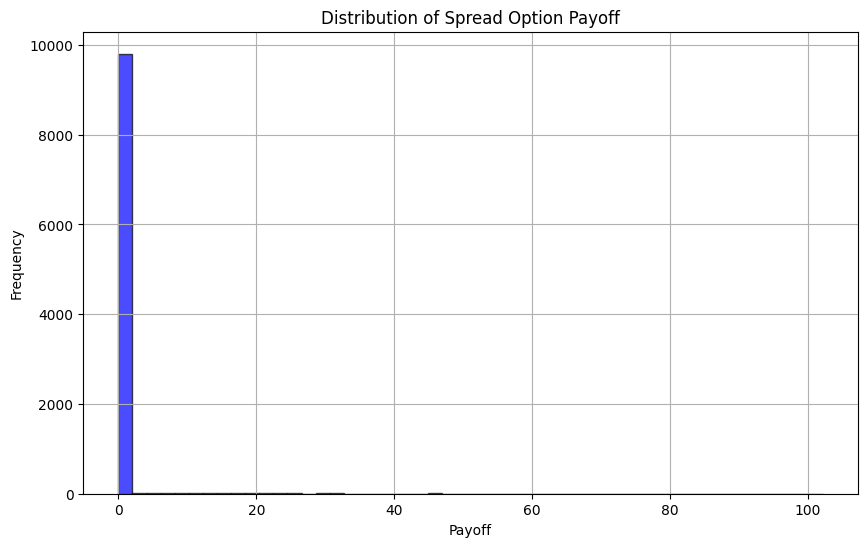

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def spread_option_payoff(paths1, paths2, K):
    """
    스프레드 옵션의 페이오프 계산 함수

    Parameters:
    paths1: 첫 번째 주식 가격 경로 배열
    paths2: 두 번째 주식 가격 경로 배열
    K: 행사가격

    Returns:
    스프레드 옵션의 페이오프 배열
    """
    spread = paths1[:, -1] - paths2[:, -1]
    payoff = np.maximum(spread - K, 0)
    return payoff

# yfinance를 사용하여 데이터 다운로드
tickers = ['AAPL', 'MSFT']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']
closing_prices = data.values

# 두 주식의 초기 가격, 변동성 계산
S0 = closing_prices[0]
sigma = np.std(np.diff(np.log(closing_prices), axis=0), axis=0) * np.sqrt(252)

# 스프레드 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 0  # 스프레드 옵션의 행사가격

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 두 주식의 경로 추출
paths1 = paths[:, :, 0]
paths2 = paths[:, :, 1]

# 스프레드 옵션 페이오프 계산
spread_payoff = spread_option_payoff(paths1, paths2, K)

# 스프레드 옵션 가격 계산 (할인된 페이오프 평균)
spread_price = np.exp(-r * T) * np.mean(spread_payoff)
print(f"Spread Option Price: {spread_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(spread_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Spread Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


애플(AAPL)과 테슬라(TSLA) 주식을 사용

[*********************100%%**********************]  2 of 2 completed


Spread Option Price: 35.10


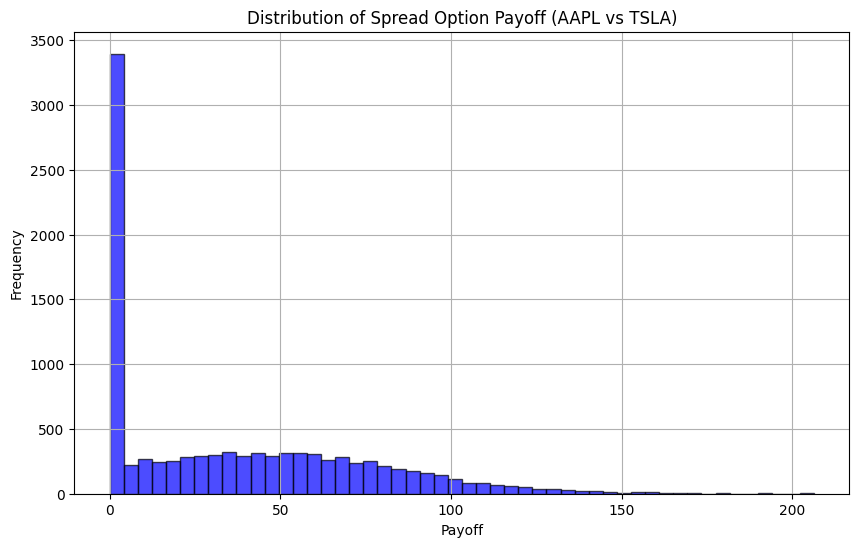

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def spread_option_payoff(paths1, paths2, K):
    """
    스프레드 옵션의 페이오프 계산 함수

    Parameters:
    paths1: 첫 번째 주식 가격 경로 배열
    paths2: 두 번째 주식 가격 경로 배열
    K: 행사가격

    Returns:
    스프레드 옵션의 페이오프 배열
    """
    spread = paths1[:, -1] - paths2[:, -1]
    payoff = np.maximum(spread - K, 0)
    return payoff

# yfinance를 사용하여 데이터 다운로드
tickers = ['AAPL', 'TSLA']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']
closing_prices = data.values

# 두 주식의 초기 가격, 변동성 계산
S0 = closing_prices[0]
sigma = np.std(np.diff(np.log(closing_prices), axis=0), axis=0) * np.sqrt(252)

# 스프레드 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 0  # 스프레드 옵션의 행사가격

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 두 주식의 경로 추출
paths1 = paths[:, :, 0]
paths2 = paths[:, :, 1]

# 스프레드 옵션 페이오프 계산
spread_payoff = spread_option_payoff(paths1, paths2, K)

# 스프레드 옵션 가격 계산 (할인된 페이오프 평균)
spread_price = np.exp(-r * T) * np.mean(spread_payoff)
print(f"Spread Option Price: {spread_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(spread_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Spread Option Payoff (AAPL vs TSLA)')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
